## Predicting Spotify Music genres with Random Forest

In [116]:
# Initial imports
import pandas as pd
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


## Loading and Preprocessing Spotify Data Encoded Data

In [117]:
# Loading data
file_path = Path("Resources/spotify_main_raw_data.csv")
df = pd.read_csv(file_path)
df.head()

raw_data = df.drop(['Unnamed: 0',"track","type","id","uri","track_href","analysis_url","time_signature","artist","duration_ms","liveness"],axis=1)

raw_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,playlist
0,0.432,0.0951,1,-23.511,1,0.0388,0.909,0.890,0.0930,100.265,Jazz
1,0.643,0.2800,10,-13.774,1,0.0332,0.965,0.867,0.0865,108.046,Jazz
2,0.322,0.1520,8,-16.765,1,0.0388,0.958,0.899,0.2030,177.730,Jazz
3,0.609,0.1620,3,-17.650,1,0.0375,0.917,0.791,0.1230,106.051,Jazz
4,0.509,0.1540,1,-18.927,1,0.0410,0.978,0.936,0.2410,121.049,Jazz


Define the features set, by copying the `df` DataFrame and dropping the `playlist` column.

In [118]:
# Define features set
X = raw_data.copy()
X.drop("playlist", axis=1, inplace=True)
X.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
0,0.432,0.0951,1,-23.511,1,0.0388,0.909,0.890,0.0930,100.265
1,0.643,0.2800,10,-13.774,1,0.0332,0.965,0.867,0.0865,108.046
2,0.322,0.1520,8,-16.765,1,0.0388,0.958,0.899,0.2030,177.730
3,0.609,0.1620,3,-17.650,1,0.0375,0.917,0.791,0.1230,106.051
4,0.509,0.1540,1,-18.927,1,0.0410,0.978,0.936,0.2410,121.049


In [119]:
# Define target vector
y = df["playlist"].values.reshape(-1, 1)
y[:5]


array([['Jazz'],
       ['Jazz'],
       ['Jazz'],
       ['Jazz'],
       ['Jazz']], dtype=object)

In [120]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [121]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [122]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [123]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [124]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

C:\Users\yfkok\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


## Making Predictions Using the Random Forest Model

Validate the trained model, by predicting songs' genres using the testing data (`X_test_scaled`).

In [148]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)


## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [149]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2"], columns=["Predicted 0", "Predicted 1", "Predicted 2"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [150]:
# Displaying results
print("Confusion Matrix :")
display(cm_df)
print(f"\nAccuracy Score : {acc_score}")
print("\nClassification Report")
print(classification_report(y_test, predictions))


Confusion Matrix :


,Predicted 0,Predicted 1,Predicted 2
Actual 0,87,0,6
Actual 1,3,61,20
Actual 2,2,3,89



Accuracy Score : 0.8745387453874539

Classification Report
              precision    recall  f1-score   support

       House       0.95      0.94      0.94        93
        Jazz       0.95      0.73      0.82        84
         RNB       0.77      0.95      0.85        94

    accuracy                           0.87       271
   macro avg       0.89      0.87      0.87       271
weighted avg       0.89      0.87      0.87       271



## Feature Importance

In this section, you are asked to fetch the features' importance from the random forest model and display the top 10 most important features.

In [168]:
# Get the feature importance array
importances = rf_model.feature_importances_

# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

importance_df = pd.DataFrame(importances_sorted,columns=['feature_importances','audio_features'])

importance_df 


,feature_importances,audio_features
0,0.180890,instrumentalness
1,0.162732,tempo
2,0.158776,energy
3,0.120020,acousticness
4,0.118661,loudness
5,0.085868,valence
6,0.073754,danceability
7,0.068115,speechiness
8,0.023909,key
9,0.007275,mode


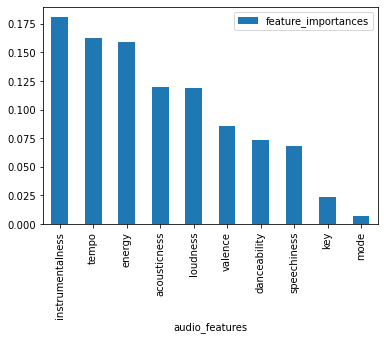

In [169]:
ax = importance_df.plot.bar(x="audio_features", y="feature_importances")